In [1]:
# 🏛 Legal Case Prioritization using Machine Learning

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Step 1: Synthetic Data Generation
np.random.seed(42)
n = 1000
case_ids = [f"CASE{1000+i}" for i in range(n)]
complexity = np.random.choice(['Low', 'Medium', 'High'], size=n, p=[0.3, 0.5, 0.2])
urgency = np.random.choice(['Low', 'Medium', 'High'], size=n, p=[0.4, 0.4, 0.2])
resource_avail = np.random.choice(['Low', 'Medium', 'High'], size=n, p=[0.2, 0.5, 0.3])

def assign_priority(c, u, r):
    score = 0
    score += {'Low': 1, 'Medium': 2, 'High': 3}[c]
    score += {'Low': 1, 'Medium': 2, 'High': 3}[u]
    score += {'Low': 1, 'Medium': 2, 'High': 1}[r]  # Lower score if more resources
    if score >= 7:
        return 'High'
    elif score >= 5:
        return 'Medium'
    else:
        return 'Low'

priority = [assign_priority(c, u, r) for c, u, r in zip(complexity, urgency, resource_avail)]

df = pd.DataFrame({
    'case_id': case_ids,
    'complexity': complexity,
    'urgency': urgency,
    'resource_availability': resource_avail,
    'priority': priority
})

/tmp/ipython-input-3518881047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='priority', palette='coolwarm')


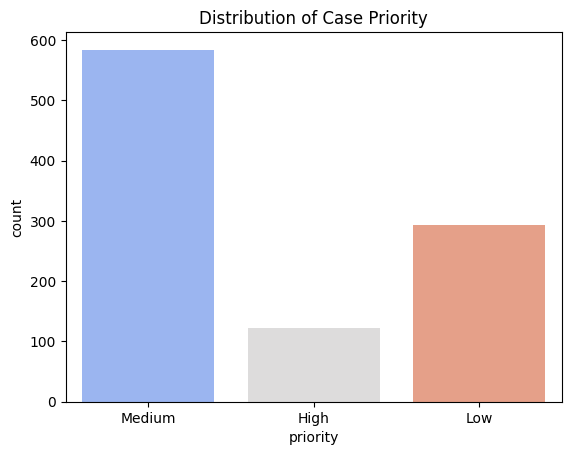

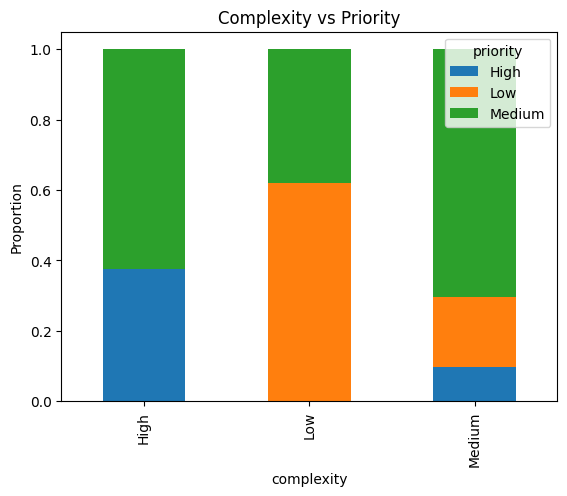

In [3]:
# Step 2: Exploratory Data Analysis (EDA)
sns.countplot(data=df, x='priority', palette='coolwarm')
plt.title("Distribution of Case Priority")
plt.show()

pd.crosstab(df['complexity'], df['priority'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Complexity vs Priority")
plt.ylabel("Proportion")
plt.show()

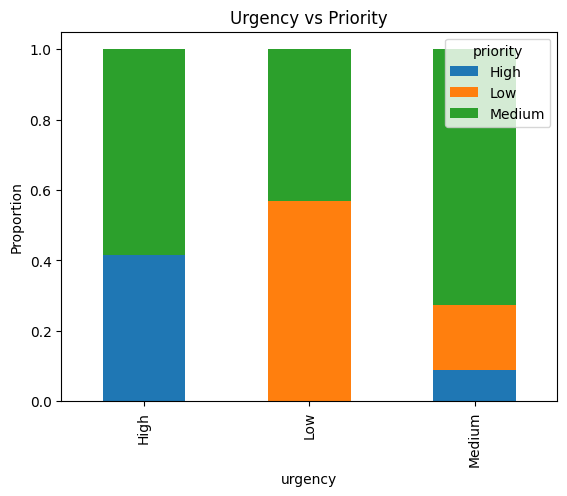

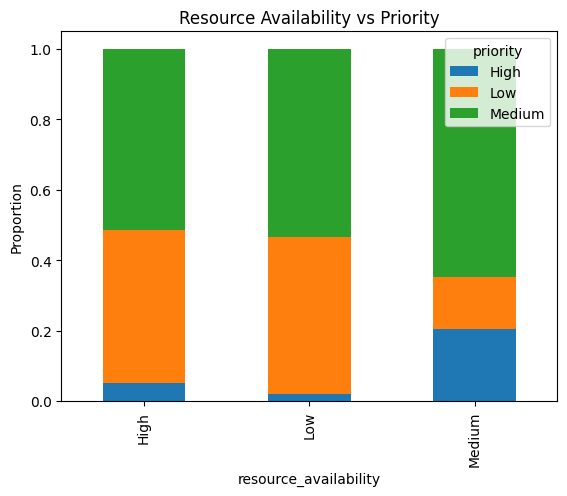

In [11]:
pd.crosstab(df['urgency'], df['priority'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Urgency vs Priority")
plt.ylabel("Proportion")
plt.show()

pd.crosstab(df['resource_availability'], df['priority'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Resource Availability vs Priority")
plt.ylabel("Proportion")
plt.show()


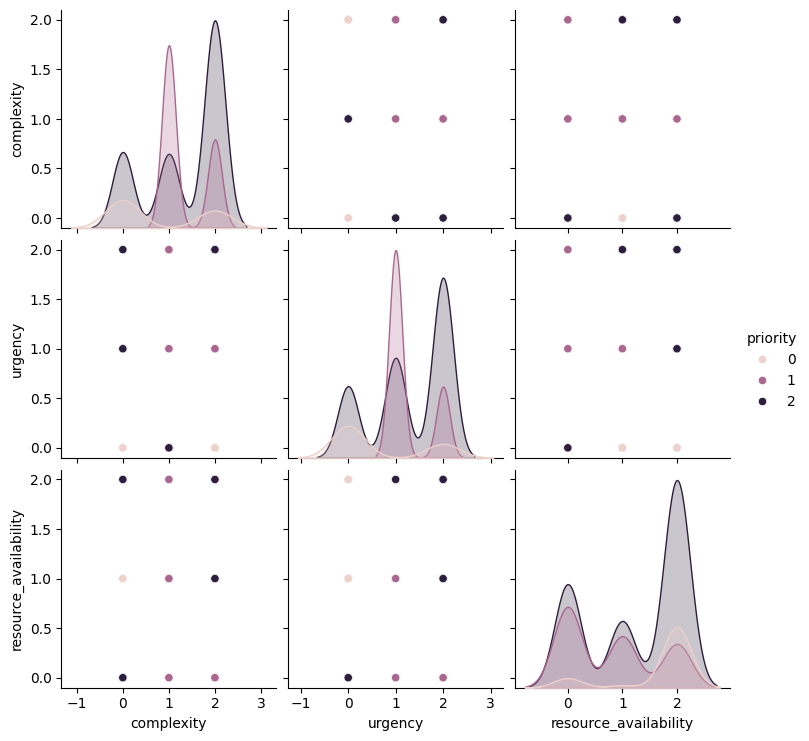

In [9]:
import seaborn as sns
sns.pairplot(df_encoded[['complexity', 'urgency', 'resource_availability', 'priority']], hue='priority')
plt.show()


In [4]:
# Step 3: Feature Encoding
df_encoded = df.copy()
le = LabelEncoder()
for col in ['complexity', 'urgency', 'resource_availability', 'priority']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded[['complexity', 'urgency', 'resource_availability']]
y = df_encoded['priority']

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


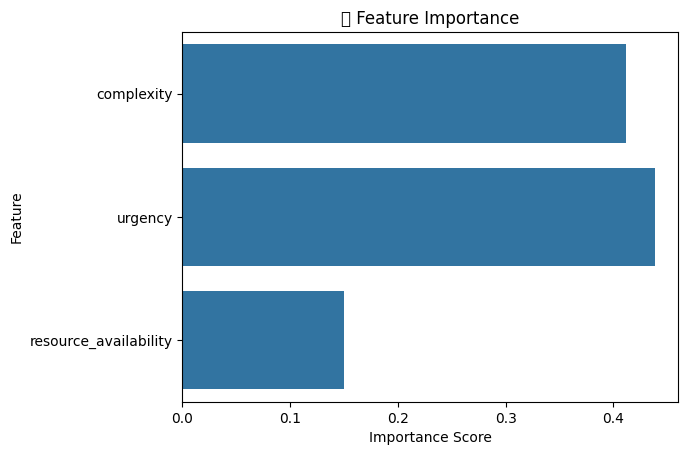

In [8]:
importances = rf.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title("🔍 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00       114

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



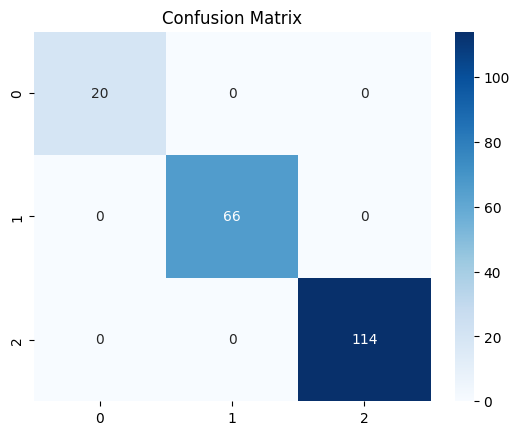

In [5]:
# Step 4: Train Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [6]:
# Step 6: Export to CSV for Power BI
df['predicted_priority'] = le.inverse_transform(rf.predict(X))
df.to_csv("legal_case_dashboard_data.csv", index=False)
print("✅ Data exported to legal_case_dashboard_data.csv")

✅ Data exported to legal_case_dashboard_data.csv


In [7]:
from google.colab import files
files.download('legal_case_dashboard_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>